<a href="https://colab.research.google.com/github/marin1225/github-slideshow/blob/master/XRP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wrangring trend data from Google Trends with pytrends. Collected daily data from 01/22/2015 through 04/25/2021, and put them all together, and downloaded as csv file.

Data Refference:Kaggle:https://www.kaggle.com/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset?select=XRP+Historical+Data.csv
GoogleTrends:https://trends.google.com/trends/explore?date=2015-01-22%202021-04-25&geo=US&q=xrp


In [ ]:
pip install pytrends

In [ ]:
#importing Panda library and pytrends
import pandas as  pd                                                                                      
from pytrends.request import TrendReq

 #storing value to variables
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))           
kw_list = ["xrp"]
multi_date_ranges=['2015-01-22 2015-09-22', '2015-09-23 2016-05-23' , '2016-05-24 2017-01-24', '2017-01-25 2017-09-25', '2017-09-26 2018-05-26', '2018-05-27 2019-01-27','2019-01-28 2019-09-28', '2019-09-29 2020-05-29', '2020-05-30 2021-01-30', '2021-01-31 2021-04-25']
  
  # create a blank dataframe to hold the results
results = pd.DataFrame()              

 # creates a request to Google Trends and sets the timeframe to be the current_date in the multi_date_range list
for current_date in multi_date_ranges:
  pytrends.build_payload(kw_list, cat=0, timeframe=current_date, geo='', gprop='')

 # each time it goes through the loop, it adds the new dataframe to the existing one
  results = results.append(pytrends.interest_over_time())

# outputs the results dataframe to a CSV file
results.to_csv("trends_data.csv")

print(results)

            xrp  isPartial
date                      
2015-01-22   14      False
2015-01-23   45      False
2015-01-24    0      False
2015-01-25   34      False
2015-01-26   28      False
...         ...        ...
2021-04-21   27      False
2021-04-22   25      False
2021-04-23   31      False
2021-04-24   22      False
2021-04-25   23      False

[2286 rows x 2 columns]


In [2]:
#mounting Google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#importing panda library
import pandas as pd

In [4]:
#reading adjusted XRP search volume data into data frame
df=pd.read_csv('/content/gdrive/My Drive/Colab Datasets/new_trends.csv') 
df.head()

,date,xrp,monthly,search_vol(adjusted)
0,1/22/15,29,1,0.29
1,1/23/15,30,1,0.30
2,1/24/15,17,1,0.17
3,1/25/15,17,1,0.17
4,1/26/15,71,1,0.71


In [ ]:
#checking the null value of the dataset
null_rows=df[df.isnull(). any(axis=1)]
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  0 non-null      object 
 1   xrp                   0 non-null      int64  
 2   monthly               0 non-null      int64  
 3   search_vol(adjusted)  0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 0.0+ bytes


In [ ]:
#reading csv file of XRP price data into dataframe as history_df
history_df=pd.read_csv('/content/gdrive/My Drive/Colab Datasets/XRP Historical Data (1).csv')
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2286 non-null   object 
 1   Price     2286 non-null   float64
 2   Open      2286 non-null   float64
 3   High      2286 non-null   float64
 4   Low       2286 non-null   float64
 5   Vol.      2286 non-null   object 
 6   Change %  2286 non-null   object 
dtypes: float64(4), object(3)
memory usage: 125.1+ KB


In [ ]:
history_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 25, 2021",1.04990,1.05015,1.07318,1.03182,1.25B,-0.02%
1,"Apr 24, 2021",1.05015,1.17025,1.17095,1.02325,1.69B,-10.26%
2,"Apr 23, 2021",1.17023,1.15859,1.19593,0.89374,4.24B,0.98%
3,"Apr 22, 2021",1.15886,1.29067,1.41758,1.10427,2.74B,-10.20%
4,"Apr 21, 2021",1.29046,1.38614,1.46239,1.28289,2.00B,-6.90%


Null(Ho): The search volume will not be a good indicator to make a trading decision.
Alternative(Ha): The search volume will be a good indicator to make a trading decision.



In [ ]:
#importing statistics from scipy library
from scipy import stats

Let's check the statistical description of XRP price data.


In [ ]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [ ]:
series_statistics(history_df['Price'])

statistics for column: Price
The max value in the column: 2.78
The min value in the column: 0.0035600000000000002
The mode value in the column: 0    0.008
dtype: float64
The median value in the column: 0.22341
The mean of the column: 0.2582325634295709
The std of the column: 0.31440663168278943


In [ ]:
history_df['Price'].describe()

count    2286.000000
mean        0.258233
std         0.314407
min         0.003560
25%         0.008070
50%         0.223410
75%         0.326260
max         2.780000
Name: Price, dtype: float64

In [ ]:
#importing matplotlib and searborn library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#suppressing, ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#downloading as a date file.
df=pd.read_csv('/content/gdrive/My Drive/Colab Datasets/new_trends.csv', parse_dates=['date'])

In [ ]:
history_df=pd.read_csv('/content/gdrive/My Drive/Colab Datasets/XRP Historical Data (1).csv', parse_dates=['Date'])

In [ ]:
#concatinating datasets on date.
concatenated1 = history_df.merge(df, left_on='Date', right_on='date') 

It seems to have some positive correlation at the lower left side. Price and search volume is somewhat have relation.

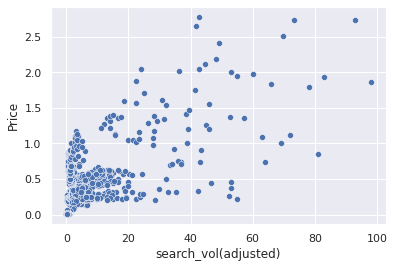

In [ ]:
#plotting scatter plot of search volume and XRP price
sns.scatterplot(x='search_vol(adjusted)', y='Price', data=concatenated1)
plt.show()


Line chart of price and search volume from 2016 to 2021. It projects that there is some relation between two.

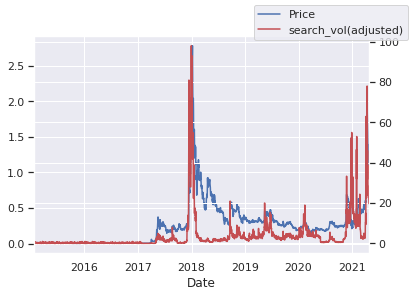

In [ ]:
#plotting line chart of price and search volume in one chart
ax=history_df.plot(x='Date', y='Price', legend=False)
ax2=ax.twinx()
df.plot(x='date', y='search_vol(adjusted)', ax=ax2, legend=False, color='r')
ax.figure.legend()

plt.show()

Pearson correlation analysis shows <0.05. It means that correlation between price and search volume is significant. 

In [ ]:
#pearson correlation analsis
stats.pearsonr(history_df['Price'], df['search_vol(adjusted)']) 

(-0.017602238517685997, 0.4002328664110693)

Let's take a closer look in shorter time range to see its significance of relation. Time range this time would be 1 year range in 2017' when the price was spiking.

In [ ]:
#storing 2017's search volume data to variable closer_lookSearch
closer_lookSearch=df.loc[(df['date']>='2017-01-01')&(df['date']<='2017-12-31'),[ 'search_vol(adjusted)', 'date']]



In [ ]:
#storing 2017's XRP price to variable closer_lookPrice
closer_lookPrice=history_df.loc[(history_df['Date']>='2017-01-01')&(history_df['Date']<='2017-12-31'), ['Price', 'Date']]#2017 XRP price

The line charts of price and search volume still shows its strong correlation even in shorter time range of 1 year.

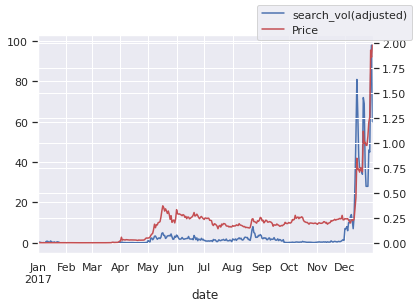

In [ ]:
#plotting dual line chart of search volume and price in 2017
ax=closer_lookSearch.plot(x='date', y='search_vol(adjusted)', legend=False)
ax2=ax.twinx()
closer_lookPrice.plot(x='Date', y='Price', ax=ax2, legend=False, color='r')
ax.figure.legend()

plt.show()

Let's look into even shorter range. This time would be the duration of 1 month in December when the chart is spiking

In [ ]:
#storing December data  of the search volume to  the variable
DecSearch=df.loc[(df['date']>='2017-12-01')&(df['date']<='2017-12-31'),[ 'search_vol(adjusted)', 'date']]

In [ ]:
#storing December data of the price to the variable
DecPrice=history_df.loc[(history_df['Date']>='2017-12-01')&(history_df['Date']<='2017-12-31'), ['Price', 'Date']]

The line charts are somewhat correlated, and can observe some offsets. Both line chart has 4peaks, and there seems to be some delay in between.



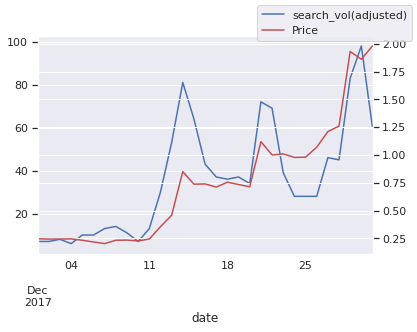

In [ ]:
#plotting dual line chart of search volume and price from December of 2017.
ax=DecSearch.plot(x='date', y='search_vol(adjusted)', legend=False)
ax2=ax.twinx()
DecPrice.plot(x='Date', y='Price', ax=ax2, legend=False, color='r')
ax.figure.legend()

plt.show()

Pearson correlation analysis prove that there is strong relation between the price and the search volume even in the shorter scale. This result is significant because of p-value being <0.05. 

In [ ]:
#pearson correlation analysis between search volume and price in December of 2017
stats.pearsonr(DecPrice['Price'], DecSearch['search_vol(adjusted)']) 

(-0.6605814745863601, 5.246964781625161e-05)

In [ ]:
#importing numpy and matplotlib library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#check the type of the array
type(array_of_search_vol)
type(array_of_Price)

pandas.core.series.Series

What would be the delay between search volume and the price? Cross correlation test will give answer to the question.

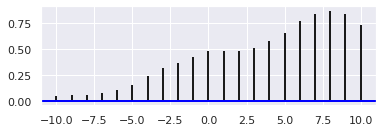

In [ ]:
 #storing 2017-12-04 to 2017-12-18 search vol. data
array_of_search_vol=df.loc[(df['date']>='2017-12-04')&(df['date']<='2017-12-18'), 'search_vol(adjusted)']        
 
 #storing 2017-12-04 to 2017-12-18 Price data.
array_of_Price=history_df.loc[(history_df['Date']>='2017-12-04')&(history_df['Date']<='2017-12-18'), 'Price']  

#converting panda to numpy
array_of_Price_array = np.array(array_of_Price)                               
array_of_search_vol_array=np.array(array_of_search_vol) 

#plot graph
fig = plt.figure()                      
ax1 = fig.add_subplot(211) 

# cross correlation using
# xcorr() function
ax1.xcorr(array_of_search_vol_array,array_of_Price_array, usevlines=True,  
         maxlags=10, normed=True,                                                                                                      
         lw=2) 
 
 # adding grid to the graph
ax1.grid(True)                                       
ax1.axhline(0, color='blue', lw=2) 

plt.show()            

On this plot, the correlation at lag 7.5 is approximately 0.85. Because 0.85 > 2/√10-l7.5l  the correlation is significant. You can conclude that the search volume would affect the price approximately in 7.5 days. Therefor, we could use search volume as a leading indicator to determin whether to purchace or sell XRP by forcasting 7.5 days later.

